In [604]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import re
from math import factorial
from math import isclose
from tqdm import tqdm

# 1

Вероятность, что определенный водитель повторится дважды за 10 поездок равна $$ C^1_9 \cdot (\frac{1}n)^2 \cdot (1- \frac{1}n) \cdot (1- \frac{2}n) \cdot ... \cdot (1- \frac{8}n) $$ 
(на 10-й поездке и любой из 9 первых). 
Всего водителей $n$. Следовательно, функция максимального правдоподобия имеет вид:
$$ L = C^1_9 \cdot n \cdot (\frac{1}n)^2 \cdot (1- \frac{1}n) \cdot ... \cdot (1- \frac{8}n)\to \max_n $$

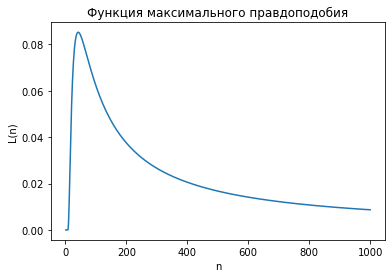

In [584]:
n = np.arange(1, 1001, dtype='int64')
L = 9 * 1/n * (1 - 1/n) * (1 - 2/n) * (1 - 3/n) * (1 - 4/n) * (1 - 5/n) * (1 - 6/n) * (1 - 7/n) * (1 - 8/n)

plt.title('Функция максимального правдоподобия')
plt.ylabel('L(n)')
plt.xlabel('n')
plt.plot(n, L)
n_hat_ml = n[L.argmax()]

In [585]:
print(f'Оценка n методом максимального правдоподобия равна {n_hat_ml}.')

Оценка n методом максимального правдоподобия равна 42.


При таком n функция максимального правдоподобия достигает своего максимума, что видно из графика.

## б)

$$ E(num) = 2 \cdot \frac{1}n + 3 \cdot 2 \cdot (\frac{1}n) \cdot (1-\frac{1}n) + 4 \cdot 3 \cdot (\frac{1}n) \cdot (1-\frac{1}n) \cdot (1-\frac{2}n) + \dots $$

Получается, что мат.ожидание является суммой такого ряда:

$$ E(num) = \sum_{i=1}^{n} (i+1) \cdot i \cdot \frac{(n-1)!}{(n-i)! \cdot n^{i}} $$

К сожалению, cумма такого ряда не нашлась, поэтому решим численно.

Получаем, что


array([2.        , 2.5       , 2.88888889, 3.21875   , 3.5104    ,
       3.77469136, 4.0181387 , 4.24501801, 4.45831574, 4.66021568,
       4.85237205, 5.03607368, 5.21234791, 5.38202942, 5.54580729])

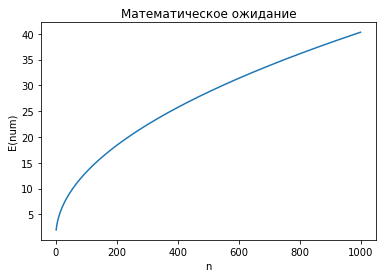

In [606]:
def Mu():
    MUs = np.empty(len(n))
    for i in n:
        E = 0
        add = 1
        for j in np.arange(i):
            add *= (i-j) / i
            E = E + (j+2) * (j+1) * (1/i) * add
        MUs[i-1] = E
    return MUs

E = Mu()
plt.title('Математическое ожидание')
plt.plot(np.arange(1, 1001), E)
plt.xlabel('n')
plt.ylabel('E(num)')
E[:15]

Найдем оценку методом моментов, приравняв значение теоретического первого начального момента и выборочного (num=10). Поскольку аналитически мат. ожидание найти не удалось, найдем n, при котором мат. ожидание достигает наиболее близкого к 10 значения (c точностью $\frac{1}{10^{1.5}}$).

In [596]:
print(f'Оценка n методом моментов равна {n[np.isclose(E, 10, atol=10**(-1.5))][0]}.')

Оценка n методом моментов равна 55.


## в)

Проведем 10000 экспериментов вызова такси до первого повторного при $n=100$ и запишем номера заказов с первым повтором.

In [610]:
n_obs = np.empty(10000, dtype='int64')
ml = np.empty(10000, dtype='int64')
mm = np.empty(10000)
np.random.seed(800)

for i in np.arange(10000):
    rides = np.random.choice(100, size=1000)
    j = np.unique(rides, return_index=True)[1]
    res = np.zeros_like(rides, dtype=bool)
    res[j] = True
    n_obs[i] = np.where(res == False)[0][0] + 1

print(f'Номера первого повтора: {n_obs[:10]}...')

Номера первого повтора: [ 8  4  6  7 24  3 12 10 19 19]...


In [ ]:
k = 0

for i in tqdm(n_obs):
    L_func = np.zeros(1100)
    for j in np.arange(i, 800):
        func = j-1
        for m in np.arange(j-1):
            func = func * (j-m)/j
        L_func[j] = func
    ml[k] = L_func.argmax()
    k += 1

In [611]:
k = 0

for i in tqdm(n_obs):
    L_func = np.zeros(801)
    for j in np.arange(i, 801):
        L_func[j] = int(i - 1) / int(j)**int(i-1) * round(factorial(j-1)/factorial(j-i+1), 3)
    ml[k] = L_func.argmax()
    k += 1

100%|█████████████████████████████████████| 10000/10000 [02:50<00:00, 58.80it/s]


Text(0.5, 1.0, 'Распределение ml-оценок')

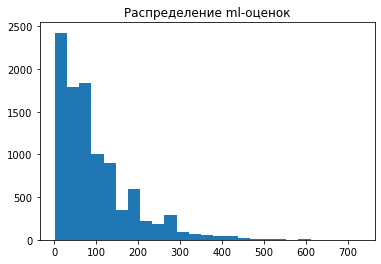

In [621]:
plt.hist(ml, bins=25)
plt.title('Распределение ml-оценок')

In [625]:
print(f'Оценка смещения ml-оценки равна {ml.mean() - 100}')

Оценка смещения ml-оценки равна -2.2055000000000007


In [623]:
print(f'Оценка дисперсии ml-оценки равна {ml.var()}')

Оценка дисперсии ml-оценки равна 8505.70506975


In [624]:
print(f'Cреднеквадратическая ошибка ml-оценки равна {((ml-100)**2).sum() / 10000}')

Cреднеквадратическая ошибка ml-оценки равна 8510.5693


In [626]:
ml.max()

728

У функции правдоподобия 1 максимум -> итераций до 800 хватило, чтобы найти максимумы всех функций правдоподобия.

Находим такие n, при которых мат. ожидание отличается от $n_{obs}[i]$ не более, чем на 0.25. Если таких значений несколько, то возьмем значение посередине, так как мат.ожидание монотонно возрастатет.

In [627]:
for i in np.arange(10000): 
    idx = np.where(np.isclose(E, n_obs[i], 
                        atol=2**(-2)))[0][(round(len(np.where(np.isclose(E, 
                        n_obs[i], atol=2**(-2)))[0]) / 2 - 1))]
    mm[i] = idx

Text(0.5, 1.0, 'Распределение mm-оценок')

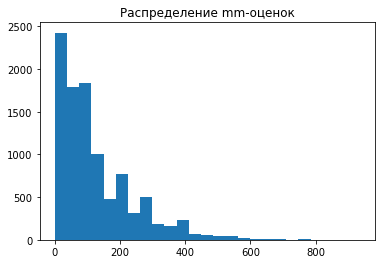

In [632]:
plt.hist(mm, bins=25)
plt.title('Распределение mm-оценок')

In [629]:
print(f'Оценка смещения mm-оценки равна {mm.mean() - 100}')

Оценка смещения mm-оценки равна 25.959999999999994


In [630]:
print(f'Оценка дисперсии mm-оценки равна {mm.var()}')

Оценка дисперсии mm-оценки равна 14094.4382


In [631]:
print(f'Cреднеквадратическая ошибка mm-оценки равна {((mm-100)**2).sum() / 10000}')

Cреднеквадратическая ошибка mm-оценки равна 14768.3598


# 2. Имена таксистов

## а)

Рассмотрим случай, когда все уникальные имена приезжают подряд:

$$
P = n \cdot 1/n \cdot (n-1)/n \cdot (n-2)/n \cdot (n-3)/n \cdot (n-4)/n \cdot (n-5)/n \cdot (6/n)^4
$$

Но если имя первого таксиста уникально, то имя второго — не всегда, так как на втором заказе снова может приехать первый таксист. Рассмотрим случай, когда сперва таксист с уникальным именем приехал 5 раза, а потом подряд приехали таксисты с 5 уникальными именами:

$$
P = n \cdot (1/n)^5 \cdot (n-1)/n \cdot (n-2)/n \cdot (n-3)/n \cdot (n-4)/n \cdot (n-5)/n
$$

(Умножаем на n так как первым уникальным таксистом может быть кто угодно из n таксистов).
Если же сперва приедут два уникальных таксиста, то для третьего, есть он не уникальный, имеется выбор уже из 2 имен, те вероятность $2/n$. Поскольку первый таксист всегда уникален, нас интересует как разместить неуникальных среди остальных 9 без повторений. Это считается по формуле: $C_9^4 = \frac{9!}{4!5!}$. При этом каждый неуникальный таксист имеет вероятность от 1/n до 6/n, в зависимости от того, после сколько уникальных имен он приехал. Выходится, что вероятность равна:

$$
P = n * (1/n)^5 \cdot (n-1)/n \cdot (n-2)/n \cdot (n-3)/n \cdot (n-4)/n \cdot (n-5)/n + .... + n * 1/n \cdot (n-1)/n \cdot (n-2)/n \cdot (n-3)/n \cdot (n-4)/n \cdot (n-5)/n \cdot (6/n)^4
$$

Каждое слагаемое вида $\frac{1}{n^9} \cdot \frac{(n-1)!}{(n-6)!} \cdot $ (Комбинацию из 4 множителей (1, 2, 3, 4, 5, 6) без учета порядка).

Посчитаем сумму таких комбинаций: 22827

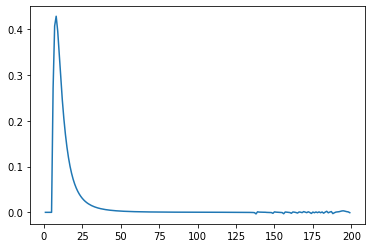

In [705]:
n = np.arange(1, 200)

L = 1/n**9 * (n-1) * (n-2) * (n-3) * (n-4) * (n-5) * 22827

plt.plot(n, L)

In [645]:
print(f'Оценка максимального правдоподобия равна {n[L.argmax()]}')

Оценка максимального правдоподобия равна 8


## б)

In [716]:
def Mu2():
    MUs = np.empty(len(n)+1)
    for i in n:
        E = 0
        for j in np.arange(min(i, 9)): 
            E = E + 1/i**9 * (j+1) * round(factorial(i-1) / factorial(i-j), 2) * combs[j]
        MUs[i] = E
    return MUs

## в)

Для функции правдоподобия константа не будет влиять на максимум, так что не будем ее учитывать.

In [695]:
np.random.seed(400)
ml = np.empty(10000)

for i in np.arange(10000):
    rides = np.random.choice(20, size=10)
    unique = len(np.unique(rides))
    L = np.zeros(101)
    for j in np.arange(unique, 101):
        L[j] = 1/j**9 * round(factorial(j-1) / factorial(j-unique), 2)
    ml[i] = L.argmax()

Text(0.5, 1.0, 'Распределение ml-оценок')

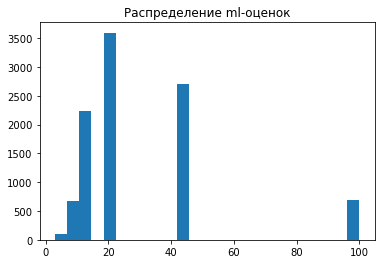

In [699]:
plt.hist(ml, bins=25)
plt.title('Распределение ml-оценок')

In [701]:
print(f'Оценка смещения ml-оценки равна {ml.mean() - 20}')

Оценка смещения ml-оценки равна 8.297


In [702]:
print(f'Оценка дисперсии ml-оценки равна {ml.var()}')

Оценка дисперсии ml-оценки равна 525.9823910000001


In [704]:
print(f'Cреднеквадратическая ошибка ml-оценки равна {((ml-20)**2).sum() / 10000}')

Cреднеквадратическая ошибка ml-оценки равна 594.8226


# 3. Иноагент Иннокентий

## а)

Сгенерируем 10000 выборок размером 20 из экспоненциального распределения с интенсивностью 1:

In [5]:
sample_expon = sts.expon.rvs(scale=1, size=(10000, 20), random_state=25)

Классический асимптотический 95% интервал для математического ожидания можно построить так:
$$ \mu \in [\overline{X} -  1.96 \cdot \frac{\hat{\sigma_x}}{\sqrt{(n_x)}}, \overline{X} +  1.96 \cdot \frac{\hat{\sigma_x}}{\sqrt{(n_x)}}]$$

Посчитаем вероятность попадания 1 (истинное значение мат. ожидания) в построенные по 20 наблюдениям доверительные интервалы.

In [564]:
(np.logical_and(((sample_expon.mean(axis=1) - 1.96 * sample_expon.std(axis=1, ddof=1) / np.sqrt(20)) <= 1),  
((sample_expon.mean(axis=1) + 1.96 * sample_expon.std(axis=1, ddof=1) / np.sqrt(20)) >= 1))).sum() / 10000

0.9042

Как отсюда видно, вероятность накрытия достаточно высока.

Теперь проделаем то же самое, но с помощью наивного бутстрапа. Суть наивного бутстрапа в том, чтобы создать много выборок (в данном случае 10000) размером 20, случайно выбирая наблюдения из исходной выборки, и посчитать по каждой из них среднее. Двусторонний доверительный интервал для мат. ожидания в данном случае ограничен кватилями 2.5% и 97.5% среднего бутстрапированных выборок.

In [572]:
np.random.seed(400)
naive_bootstrap_expon = np.empty(10000)
t_statistic_bootstrap_expon = np.empty(10000)

for i in np.arange(10000): 
    sample = np.random.choice(sample_expon[i], size = (10000, 20))
    mean = sample.mean(axis=1)
    std = sample.std(axis=1, ddof=1) / np.sqrt(20)
    t_statistic = (mean - sample_expon[i].mean()) / std
    naive_bootstrap_expon[i] = (np.logical_and(np.quantile(mean, 0.025) <= 1,
                                               np.quantile(mean, 0.975) >= 1))
    t_statistic_bootstrap_expon[i] = (np.logical_and(sample_expon[i].mean() - sample_expon[i].std(ddof=1) / np.sqrt(20)
                                                     * np.quantile(t_statistic, 0.975) <= 1,
                                                     sample_expon[i].mean() - sample_expon[i].std(ddof=1) / np.sqrt(20)
                                                     * np.quantile(t_statistic, 0.025) >= 1))

In [573]:
naive_bootstrap_expon.sum() / 10000

0.9038

Наивный бутстрап практически не изменил вероятность накрытия.

В бутстрапе t-статистики для из 10000 бутстрапированных выборок считаем не среднее, а следующую статистику:
$$ t^* = \frac{\overline{X}^* - \overline{X}}{se(\overline{X}^*)} $$

In [574]:
t_statistic_bootstrap_expon.sum() / 10000

0.9444

Такой подход позволил в 10000 экспериментах накрыть истинное мат. ожидание с вероятностью 0.9444.

## б)

Проделаем все те же действия с t-распределением с тремя степенями свободы.

In [10]:
sample_t = sts.t.rvs(df=3, size=(10000, 20), random_state=25)

In [11]:
(np.logical_and(((sample_t.mean(axis=1) - 1.96 * sample_t.std(axis=1) / np.sqrt(20)) <= 0),  
((sample_t.mean(axis=1) + 1.96 * sample_t.std(axis=1) / np.sqrt(20)) >= 0))).sum() / 10000

0.9374

Асимптотический доверительный интервал дает достаточно высокую вероятность накрытия.

In [575]:
np.random.seed(400)
naive_bootstrap_t = np.empty(10000)
t_statistic_bootstrap_t = np.empty(10000)

for i in np.arange(10000): 
    sample = np.random.choice(sample_t[i], size = (10000, 20))
    mean = sample.mean(axis=1)
    std = sample.std(axis=1) / np.sqrt(20)
    t_statistic = (mean - sample_t[i].mean()) / std
    naive_bootstrap_t[i] = (np.logical_and(np.quantile(mean, 0.025) <= 0,
                                               np.quantile(mean, 0.975) >= 0))
    t_statistic_bootstrap_t[i] = (np.logical_and(sample_t[i].mean() - sample_t[i].std() / np.sqrt(20)
                                                     * np.quantile(t_statistic, 0.975) <= 0,
                                                     sample_t[i].mean() - sample_t[i].std() / np.sqrt(20)
                                                     * np.quantile(t_statistic, 0.025) >= 0))

In [576]:
naive_bootstrap_t.sum() / 10000

0.9206

Наивный бутстрап дает вероятность накрытия ниже, чем асимптотический интервал.

In [577]:
t_statistic_bootstrap_t.sum() / 10000

0.9245

Бутстрап t-статистики, как и в случае с экспоненциальным распределением, дает вероятность накрытия, равную 0.9245.

## в)

Заметим, что в обоих случаях вероятность накрытия истинного мат. ожидания методом бутстрапа t-статистики равна 1. При это асимптотический интервал оказался лучше наивного бутстрапа для t-распределения, но хуже для экспоненциального. Это, вероятно, обусловлено тем, что среднее из t-распределения быстрее сходится к нормальному распределению, чем среднее из экспоненциального, что дает более высокую вероятность накрытия асимптотическим доверительным интервалом.

## 4

Импортируем таблицу с оценками за экзамен по 30-бальной шкале (отсутствие на экзамене равно 0).

In [84]:
df = pd.read_csv('desktop/grades.csv', sep=';')
df

,Last name,Grade
0,Репенкова,16
1,Ролдугина,0
2,Сафина,19
3,Сидоров,26
4,Солоухин,21
...,...,...
327,Сенников,19
328,Ся,0
329,Сятова,0
330,Темиркулов,0


## а)

Создаем два массива -- фамилии с гласной буквы и с согласной.

In [125]:
vowel = np.empty(2)
consonant = np.empty(2)

for i in df.index:
    if df.loc[i, 'Last name'].startswith(('А', 'О', 'У', 'Ы', 'Э', 'Е', 'Ё', 'И', 'Ю', 'Я')):
        vowel = np.vstack((vowel, df.loc[i].values))
    else:
        consonant = np.vstack((consonant, df.loc[i].values))

vowel = vowel[1:]
consonant = consonant[1:]

Считаем количество степеней свободы $d$ по формуле:
$$
d \approx \frac{(\frac{\hat{\sigma_x}^2}{n_x} + \frac{\hat{\sigma_y}^2}{n_y})^2}{\frac{\hat{\sigma_x}^4}{n_x^2 \cdot (n_x - 1)} + \frac{\hat{\sigma_y}^4}{n_y^2 \cdot (n_y - 1)}}
$$

При верной нулевой гипотезе $\mu_x = \mu_y$ t-статистика равна:

$$
t_{obs} = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{\hat{\sigma_x}^2}{n_x} + \frac{\hat{\sigma_y}^2}{n_y}}} \approx t_d
$$

Найдем p-value как $\min(P(t \leq t_{obs}), P(t > t_{obs}))$

In [665]:
d = (np.var(vowel[:, 1], ddof=1) / len(vowel) + np.var(consonant[:, 1], ddof=1) / len(consonant)) ** 2/ (np.var(vowel[:, 1], ddof=1)**2 / (len(vowel)**2 * (len(vowel)-1)) + np.var(consonant[:, 1], ddof=1)**2 / (len(consonant)**2 * (len(consonant)-1)))

t_obs = (vowel[:, 1].mean() - consonant[:, 1].mean()) / np.sqrt(np.var(vowel[:, 1], ddof=1) / len(vowel) + np.var(consonant[:, 1], ddof=1) / len(consonant))

print(f'P-value равно {sts.t.cdf(t_obs, df=d) * 2}.')

P-value равно 0.43235594220891316.


In [656]:
sts.ttest_ind(list(vowel[:,1]), list(consonant[:, 1]), equal_var=False)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

Гипотеза $H_0$ не отвергается.

## б)

In [118]:
np.random.seed(300)

means_diff = np.empty(10000)
var = np.empty(10000)


for i in np.arange(10000):
    sample_vowel = np.random.choice(vowel[:, 0], size = len(vowel))
    vowels = vowel[np.isin(vowel[:, 0], sample_vowel)][:, 1]
    
    sample_consonant = np.random.choice(consonant[:, 0], size = len(consonant))
    consonants = consonant[np.isin(consonant[:, 0], sample_consonant)][:, 1]
    
    means_diff[i] = vowels.mean() - consonants.mean()
    var[i] = np.sqrt(np.var(vowels, ddof=1) / len(sample_vowel) + np.var(consonants, ddof=1) / len(sample_consonant))

In [414]:
print(f'P-value равно {np.mean(vowel[:,1].mean() - consonant[:,1].mean() > means_diff) * 2}.')

P-value равно 0.675.


Гипотеза $H_0$ не отвергается.

## в)

In [415]:
t_statistics = (means_diff - (vowel[:,1].mean() - consonant[:,1].mean())) / var

t_obs = (vowel[:,1].mean() - consonant[:,1].mean()) / np.sqrt(np.var(vowel[:,1], ddof=1) / len(vowel) + np.var(consonant[:,1], ddof=1) / len(consonant))

print(f'P-value равно {np.mean(t_obs > t_statistics).mean() * 2}.')

P-value равно 0.2838.


Гипотеза $H_0$ не отвергается.

## г)

In [ ]:
np.random.seed(100)
last_name = np.array(df['Last name'])
grade = np.array(df['Grade'])
means_diff2 = np.empty(10000)

for i in np.arange(10000):
    np.random.shuffle(last_name)
    bootstrap = np.vstack((last_name, grade))
    mean_consonant2 = bootstrap[:, np.isin(bootstrap[0, :], consonant)][1, :].mean()
    mean_vowel2 = bootstrap[:, np.isin(bootstrap[0, :], vowel)][1, :].mean()
    
    means_diff2[i] = mean_vowel2 - mean_consonant2

In [ ]:
np.mean(vowel[:,1].mean() - consonant[:,1].mean() > means_diff2) * 2

In [669]:
sts.ttest_ind(list(vowel[:,1]), list(consonant[:, 1]), equal_var=False, permutations=10000, random_state=200)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3972602739726027)

Гипотеза $H_0$ не отвергается.

# 5. Шансы и риски.

## а)

Разделим всех студентов на четыре группы: по строчкам — гласная или согласная первая буква фамилии, по столбцам —выше медианы или ниже оценка за экзамен.

In [418]:
median = df['Grade'].median()
table = np.array([[(vowel[:, 1] > median).sum(), (vowel[:, 1] <= median).sum()],
                 [(consonant[:, 1] > median).sum(), (consonant[:, 1] <= median).sum()]])


Получилась следующая таблица сопряженности:

<table>
<tr><td>
    
|| Выше медианы |  Ниже медианы|
|--|--|--|
|Гласная| 21 | 28 |
|Согласная| 145 | 138 |

</td></tr> </table>
    
Отношение шансов равно $\hat{OR} = \frac{a/b}{c/d} = \frac{21/28}{145/138}$.

Известно, что величина асимптотически $\frac{ln(\hat{OR}) - ln(OR)}{se(ln(\hat{OR}))} \approx N(0,1)$

Тогда для нахождения асимптотического доверительного интервала воспользуемся нормальным распределением и найдем его для сперва для логарифма отношений, а далее сделаем преобразование $ ln(OR) \in [CI_l, CI_r]$ -> $OR \in [e^{CI_l}, e^{CI_r}] $.



In [35]:
OR_hat = (table[0,0] / table[0,1]) / (table[1,0] / table[1,1])

CI_L = np.exp(np.log(OR_hat) - 1.96 * np.sqrt(1/table[0,0] + 1/table[0,1] + 1/table[1,0] + 1/table[1,1]))
CI_R = np.exp(np.log(OR_hat) + 1.96 * np.sqrt(1/table[0,0] + 1/table[0,1] + 1/table[1,0] + 1/table[1,1]))

print(f'Доверительный интервал для OR: [{CI_L}, {CI_R}]')

Доверительный интервал для OR: [0.3870902431823096, 1.3162320763800788]


Считаем $Z_{obs}$ при верной $H_0$: $ln(OR) = 0$.

In [420]:
z_obs = (np.log(OR_hat) - 0)/np.sqrt(1/table[0,0] + 1/table[0,1] + 1/table[1,0] + 1/table[1,1])

print(f'P-value равен {sts.norm.cdf(z_obs) * 2}')

P-value равен 0.280180274566451


Следовательно, гипотеза $H_0$ не отвергается, так как p-value $> 0.05$.

## б) 

Аналогично с пунктом а):
1) $\hat{RR} = \frac{a/(a+b)}{c/(c+d)} = \frac{21/(21+28)}{145/(145+138)}$

2) $\frac{ln(\hat{RR}) - ln(RR)}{se(ln(\hat{RR}))} \approx N(0,1)$

Поэтому будем использовать такую же процедуру.

In [421]:
RR_hat = (table[0,0] / table.sum(axis=1)[0]) / (table[1,0] / table.sum(axis=1)[1])

CI_L = np.exp(np.log(RR_hat) - 1.96 * np.sqrt((1-table[0,0] / table.sum(axis=1)[0]) / (table[0,0] * table[0,0] / table.sum(axis=1)[0]) + (1-table[1,0] / table.sum(axis=1)[1]) / (table[1,0] * table[1,0] / table.sum(axis=1)[1])))
CI_R = np.exp(np.log(RR_hat) + 1.96 * np.sqrt((1-table[0,0] / table.sum(axis=1)[0]) / (table[0,0] * table[0,0] / table.sum(axis=1)[0]) + (1-table[1,0] / table.sum(axis=1)[1]) / (table[1,0] * table[1,0] / table.sum(axis=1)[1])))

print(f'Доверительный интервал для RR: [{CI_L}, {CI_R}]')

Доверительный интервал для RR: [0.49789893903633947, 1.4052127936660306]


In [423]:
z_obs = (np.log(RR_hat) - 0)/ np.sqrt((1-table[0,0] / table.sum(axis=1)[0]) / (table[0,0] * table[0,0] / table.sum(axis=1)[0]) + (1-table[1,0] / table.sum(axis=1)[1]) / (table[1,0] * table[1,0] / table.sum(axis=1)[1]))

print(f'P-value равен {sts.norm.cdf(z_obs) * 2}')

P-value равен 0.49985465625289704


Следовательно, гипотеза $H_0$ не отвергается, так как p-value $> 0.05$.

## в) 

Для студентов с фамилией, начинающейся на гласную, сгенерируем выборку размером 49 из распределения Бернулли, где 1 — написал выше медианы, а 0 — ниже. $P(x=1) = \frac{21}{21+28}$.

Аналогично для студентов с 'согласной' фамилией. 

Проделаем эти шаги 10000, каждый раз считая для двух выборок $\hat{OR^*}$.

Доверительный интервал для OR задается квантилями 2.5% и 97.5% бутстрапированных $\hat{OR^*}$.

In [63]:
sample_vowel = np.random.choice([1, 0], size=(10000, table.sum(axis=1)[0]),
                                p=[table[0,0]/table.sum(axis=1)[0], 
                                   table[0,1]/table.sum(axis=1)[0]]).sum(axis=1) / table.sum(axis=1)[0]

sample_consonant = np.random.choice([1, 0], size=(10000, table.sum(axis=1)[1]),
                                p=[table[1,0]/table.sum(axis=1)[1], 
                                   table[1,1]/table.sum(axis=1)[1]]).sum(axis=1) / table.sum(axis=1)[1]

ORs = sample_vowel / sample_consonant

In [64]:
CI_L = np.quantile(ORs, 0.025)
CI_R = np.quantile(ORs, 0.975)

print(f'Доверительный интервал для OR: [{CI_L}, {CI_R}]')

Доверительный интервал для OR: [0.5603106914407555, 1.1388468322080194]


In [424]:
print(f'P-value равен {(OR_hat >= ORs).mean() * 2}.')

P-value равен 0.403.


Следовательно, гипотеза $H_0$ не отвергается, так как p-value $> 0.05$.

# 6. Корреляция

## a)

In [16]:
last_name_len = df['Last name'].str.len()

In [670]:
beta = df['Grade'].mean() / last_name_len.mean()
print(f'Оценка параметра бета равна {beta}')

Оценка параметра бета равна 2.0613026819923372


In [425]:
corr = sts.pearsonr(last_name_len, df['Grade'])[0]

print(f'Выборочная корреляция равна {corr}')

Выборочная корреляция равна 0.025328052669147692


## б)

Случайный образом перемешаем перемешаем фамилии студентов 10000 раз и посчитаем выборочную корреляция между фамилией и оценкой. Рассчитаем p-value как $\min(P(x \leq \overline{corr}), P(x > \overline{corr}))$

In [22]:
corrs = np.empty(shape=(10000))
last_name = np.array(last_name_len)
np.random.seed(400)
for i in np.arange(10000): 
    np.random.shuffle(last_name)
    corrs[i] = sts.pearsonr(last_name, df['Grade'])[0]

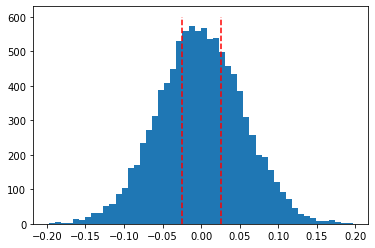

In [430]:
plt.hist(corrs, bins=50)
plt.vlines(corr, 0, 600, colors='red', linestyles='dashed')
plt.vlines(-corr, 0, 600, colors='red', linestyles='dashed')

In [426]:
print(f'p-value равно {(1 - (corrs>-corr).mean()) * 2}')

p-value равно 0.6539999999999999


## 7. ГПТ

__Задача из probability_pro__: В урне 5 белых и 11 черных шаров. Два шара извлекаются по очереди. Какова вероятность того, что второй шар будет черным?

__ЧАТ:__ Первый шар может быть белым или черным, поэтому мы рассмотрим два случая:

1) Если первый шар белый, то вероятность того, что второй шар будет черным, равна количеству черных шаров, поделенному на общее количество оставшихся шаров:

P(второй шар черный | первый шар белый) = 11/15

2) Если первый шар черный, то вероятность того, что второй шар будет черным, равна количеству черных шаров (уменьшенному на 1, так как один черный шар уже был извлечен), поделенному на общее количество оставшихся шаров (уменьшенное на 1, так как один шар уже был извлечен):

P(второй шар черный | первый шар черный) = 10/14 = 5/7

Таким образом, общая вероятность того, что второй шар будет черным, равна сумме вероятностей для каждого случая, умноженных на вероятность выбора соответствующего первого шара:

P(второй шар черный) = P(первый шар белый) * P(второй шар черный | первый шар белый) + P(первый шар черный) * P(второй шар черный | первый шар черный)
= (5/16) * (11/15) + (11/16) * (5/7)
≈ 0.524

Таким образом, вероятность того, что второй шар будет черным, составляет примерно 0,524.

__Я:__ Первая часть верна, но если первый шар - черный, то на втором шаге остается 15 шаров, а не 14

__ЧАТ:__ Спасибо за замечание, это действительно ошибка. Вероятность того, что второй шар будет черным при условии, что первый шар черный, должна быть равна 10/15 = 2/3. Поэтому общая вероятность того, что второй шар будет черным, равна:

P(второй шар черный) = P(первый шар белый) * P(второй шар черный | первый шар белый) + P(первый шар черный) * P(второй шар черный | первый шар черный)
= (5/16) * (11/15) + (11/16) * (2/3)
≈ 0.527

Извините за путаницу.

__Я:__ верно, но неправильно посчитано значение выражения

__ЧАТ:__ Правильное значение выражения равно:

P(первый шар черный и второй шар черный) = P(первый шар черный) * P(второй шар черный | первый шар черный)
= (11/16) * (10/15)
= 11/24
≈ 0.458

Таким образом, вероятность того, что первый и второй шары будут черными, составляет примерно 0.458.

__Я:__ нет, неправильно посчитано выражение (5/16) * (11/15) + (11/16) * (2/3)

__ЧАТ:__ Исправленное значение выражения равно:

P(первый шар белый и второй шар черный) + P(первый шар черный и второй шар белый) + P(оба шара черные) = 
(5/16) * (11/15) + (11/16) * (5/15) + (11/16) * (10/15)
= 55/192 + 55/192 + 11/24
= 77/192
≈ 0.401

Таким образом, вероятность того, что первый и второй шары будут разного цвета или оба черные, составляет примерно 0.401.

__Я:__ абстрагируйся от задачи, посчитай значение (5/16) * (11/15) + (11/16) * (2/3)

__ЧАТ:__ (5/16) * (11/15) + (11/16) * (2/3) = 55/240 + 66/96 = 11/48 + 11/16 = 77/192 ≈ 0.401.

__Я:__ неверно

__ЧАТ:__ Давайте проверим:

(5/16) * (11/15) + (11/16) * (2/3) = (55/240) + (22/48)
= (11/48) + (11/24) = (11/48) + (22/48) = 33/48 = 0.6875

Таким образом, правильный ответ равен 0.6875, а не 0.401.

__Я:__ Верно

## 8. Источник

По ходу курса по математической статистике я иногда обращался к аналогичному курсу Филиппа Ульянкина, так как там схожие темы объяснялись менее строго, но с демонстрацией симуляций в python, что помогало более наглядно представить себе темы. В частности, сильно помог разобраться в проверке гипотез. Вот ссылка на курс в ютубе:
https://youtube.com/playlist?list=PLNKXA-74YGLjDOtDSZEFoy1yP-3AfiHUC